## Estadistica Aplicada
2do parcial

Estadística aplicada

Francisco Javier Chávez Hernández 2034204

Gpo 44

7 de octubre

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from lifelines import KaplanMeierFitter, ExponentialFitter, CoxPHFitter, WeibullAFTFitter, LogNormalAFTFitter, WeibullFitter, LogNormalFitter
import seaborn as sns

In [45]:
prestamos=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
prestamos.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


## 1. Análisis exploratorio

In [46]:
# a) cuantas variables y cuantas observaciones tienen la base?
num_var=len(prestamos.columns)
num_var #numero de variables

21

In [47]:
prestamos.count(axis=0) #nombre de las variables y observaciones en cada una

saldo_cuenta               1000
meses                      1000
historia_crediticia        1000
uso                        1000
cantidad                   1000
saldo_cuenta_ahorro         817
años_trabajando            1000
tasa_de_interes            1000
genero_estado_civil        1000
aval                         52
años_actual_domicilio      1000
activos                    1000
edad                       1000
planes_de_pago              186
casa                       1000
numero_creditos            1000
situacion_laboral          1000
dependientes_economicos    1000
telefono                   1000
extranjero                 1000
credito_pagado             1000
dtype: int64

In [48]:
num_obs=len(prestamos.count(axis=1)) #nombre de las filas
num_obs

1000

In [49]:
# b) Cuál es el monto promedio de los créditos otorgados por el banco?
prestamos.describe()

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.404000,0.963000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000


El monto promedio de los créditos otorgados es de €3271.258


In [50]:
# c) Cuál es el tiempo promedio que se tardaron en pagar el préstamo los que pagaron el préstamo en su totalidad?
pagados=prestamos.query('credito_pagado==1')
pagados.describe()

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.0
mean,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714,0.415714,0.952857,1.0
std,11.079564,2401.472278,1.128078,1.108373,11.381145,0.584721,0.362844,0.493197,0.212096,0.0
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,12.000000,1375.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,1.0
50%,18.000000,2244.000000,3.000000,3.000000,34.000000,1.000000,1.000000,0.000000,1.000000,1.0
75%,24.000000,3634.750000,4.000000,4.000000,42.250000,2.000000,1.000000,1.000000,1.000000,1.0
max,60.000000,15857.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.0


Los que ya han pagado el préstamo en su totalidad se tardaron en promedio 19.207 meses

In [51]:
# d) Cuál es la tasa de interés promedio otorgada por el banco?


La tasa de interés promedio otorgada fue del 2.973%

In [52]:
# e) Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron?


El monto promedio de los que ya pagaron es de €2985.457, y la tasa de interés de 2.92%

In [53]:
# f) Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado?
no_pagados=prestamos.query('credito_pagado==0')
no_pagados.describe()

,meses,cantidad,tasa_de_interes,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,credito_pagado
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333,0.376667,0.986667,0.0
std,13.282639,3535.818955,1.088395,1.094605,11.222379,0.559702,0.360911,0.485360,0.114889,0.0
min,6.000000,433.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,12.000000,1352.500000,2.000000,2.000000,25.000000,1.000000,1.000000,0.000000,1.000000,0.0
50%,24.000000,2574.500000,4.000000,3.000000,31.000000,1.000000,1.000000,0.000000,1.000000,0.0
75%,36.000000,5141.500000,4.000000,4.000000,40.000000,2.000000,1.000000,1.000000,1.000000,0.0
max,72.000000,18424.000000,4.000000,4.000000,74.000000,4.000000,2.000000,1.000000,1.000000,0.0


El monto promedio de los que no han pagado en su totalidad es de €3938.126, y la tasa de interés de 3.096%

## 2. Estime un modelo de Kaplan-meier 

<Axes: xlabel='timeline'>

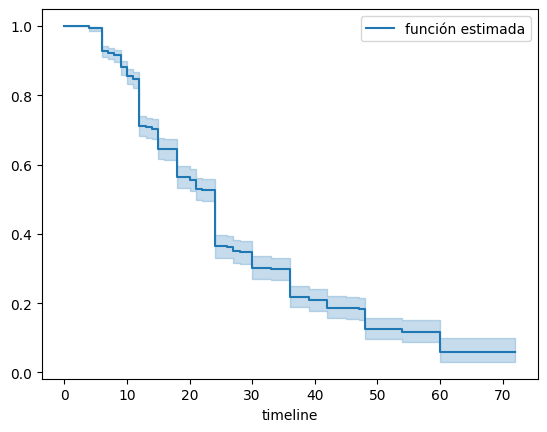

In [54]:
KM=KaplanMeierFitter().fit(prestamos['meses'], prestamos['credito_pagado'])
KM.plot_survival_function(label='función estimada')

In [55]:
# a) cuál es la mediana del tiempo y qué significa?
KM.survival_function_


,KM_estimate
timeline,
0.0,1.000000
4.0,0.994000
5.0,0.993000
6.0,0.927000
7.0,0.921951
8.0,0.915892
9.0,0.880510
10.0,0.854824
11.0,0.845544


In [56]:
KM.median_survival_time_

24.0

La mediana es el tiempo en el cual la curva cambia de una probabilidad de supervivencia mayor de 0.5 a una menor de 0.5. Es el tiempo que pasa desde el inicio de la observación hasta que la mitad de los individuos observados han experimentado el evento de fallo. En este caso, si la persona ya pagó en su totalidad el préstamo solicitado, lo cual sucede en el mes 24, o sea dos años.

In [57]:
#c)  es mayor/menor que el tiempo promedio del inciso 1c


En el 1c el tiempo promedio fue de 19.20 meses, la mediana es de 24. El tiempo es mayor en la mediana.

## 3. Determine si el riesgo de que el préstamo se pague en su totalidad es constante, creciente, decreciente, o tipo log-normal respecto al tiempo

In [58]:
exp=ExponentialFitter().fit(prestamos['meses'], prestamos['credito_pagado'])
mweibull=WeibullFitter().fit(prestamos['meses'], prestamos['credito_pagado'])
mlogn=LogNormalFitter().fit(prestamos['meses'], prestamos['credito_pagado'])

In [59]:
print('Exponencial:',exp.AIC_.round(2),'Weibull:', mweibull.AIC_.round(2), 'LogNormal:',mlogn.AIC_.round(2))

Exponencial: 6157.19 Weibull: 5900.98 LogNormal: 5813.75


El modelo que mejor se ajusta es el LogNormal, por lo tanto el riesgo de que el préstamo se pague en su totalidad es LogNormal con respecto al  tiempo

Text(0.5, 1.0, 'Función de riesgo de pago total. LogNormal')

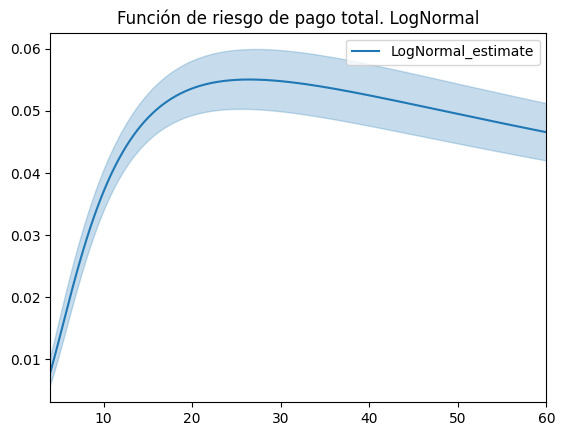

In [60]:
mlogn.plot_hazard()
plt.xlim(4,60)
plt.title('Función de riesgo de pago total. LogNormal')

## 4. Estimar un modelo de Cox para ver qué factores influyen sobre el riesgo de que el préstamo se pague en su totalidad

In [61]:
#missing values
prestamos.isnull().sum()

saldo_cuenta                 0
meses                        0
historia_crediticia          0
uso                          0
cantidad                     0
saldo_cuenta_ahorro        183
años_trabajando              0
tasa_de_interes              0
genero_estado_civil          0
aval                       948
años_actual_domicilio        0
activos                      0
edad                         0
planes_de_pago             814
casa                         0
numero_creditos              0
situacion_laboral            0
dependientes_economicos      0
telefono                     0
extranjero                   0
credito_pagado               0
dtype: int64

In [62]:
#cambiar columna aval. 1=hay aval, 0=no hay aval
prestamos['aval']=prestamos['aval'].map({np.nan:0,'aval':1})
prestamos.head(10)

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,0,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,0,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,0,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,1,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,0,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0
5,sin_cuenta,36,pago_algun_credito,colegiaturas,9055,NaN,1_a_4,2,hombre_soltero,0,...,sin_activos,35,NaN,prestada,1,obrero,2,1,1,1
6,sin_cuenta,24,pago_algun_credito,mobiliario,2835,500_a_1000,mas_de_7,3,hombre_soltero,0,...,seguro_vida,53,NaN,propia,1,gobierno,1,0,1,1
7,cero_a_200,36,pago_algun_credito,coche_usado,6948,menor_100,1_a_4,2,hombre_soltero,0,...,otro_tipo,35,NaN,renta,1,administrativo,1,1,1,1
8,sin_cuenta,12,pago_algun_credito,TV,3059,mas_de_1000,4_a_7,2,hombre_divorciado,0,...,bienes_raices,61,NaN,propia,1,obrero,1,0,1,1
9,cero_a_200,30,no_ha_pagado,coche_nuevo,5234,menor_100,desempleado,4,hombre_divorciado,0,...,otro_tipo,28,NaN,propia,2,administrativo,1,0,1,0


In [63]:
prestamos.dtypes

saldo_cuenta               object
meses                       int64
historia_crediticia        object
uso                        object
cantidad                    int64
saldo_cuenta_ahorro        object
años_trabajando            object
tasa_de_interes             int64
genero_estado_civil        object
aval                        int64
años_actual_domicilio       int64
activos                    object
edad                        int64
planes_de_pago             object
casa                       object
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
telefono                    int64
extranjero                  int64
credito_pagado              int64
dtype: object

In [64]:
#hacer dummies para las categóricas
dummies1 = pd.get_dummies(prestamos['saldo_cuenta']).astype(int)
dummies1 = dummies1[['cero_a_200','mas_de_200','menor_a_cero']]
#sin_cuenta fuera



In [65]:
dummies2 = pd.get_dummies(prestamos['historia_crediticia']).astype(int)
dummies2 = dummies2[['no_ha_pagado','pago_algun_credito','pago_retrasado','pago_todos']]
#sin_creditos fuera

In [66]:
dummies3 = pd.get_dummies(prestamos['uso']).astype(int)
dummies3 = dummies3[['TV','coche_nuevo','coche_usado','colegiaturas','mobiliario','poner_negocio','reestructuración','reparaciones','utensilios_hogar']]
#otros fuera

In [67]:
dummies4 = pd.get_dummies(prestamos['saldo_cuenta_ahorro']).astype(int)
dummies4 = dummies4[['100_a_500','500_a_1000','mas_de_1000']]
#menor_100 fuera

In [68]:
dummies5 = pd.get_dummies(prestamos['años_trabajando']).astype(int)
dummies5 = dummies5[['1_a_4','4_a_7','mas_de_7','menor_a_1']]
#desempleado fuera

In [69]:
dummies6 = pd.get_dummies(prestamos['genero_estado_civil']).astype(int)
dummies6 = dummies6[['hombre_divorciado','hombre_soltero']]
#mujer_no_soltera fuera

In [70]:
dummies7 = pd.get_dummies(prestamos['activos']).astype(int)
dummies7 = dummies7[['bienes_raices','otro_tipo','seguro_vida']]
#sin_activos fuera

In [71]:
dummies8 = pd.get_dummies(prestamos['planes_de_pago']).astype(int)
dummies8 = dummies8[['bancario']]
#departamental fuera

In [72]:
dummies9 = pd.get_dummies(prestamos['casa']).astype(int)
dummies9 = dummies9[['propia','renta']]
#prestada fuera

In [73]:
dummies10 = pd.get_dummies(prestamos['situacion_laboral']).astype(int)
dummies10 = dummies10[['administrativo','gobierno','obrero']]
#desempleado fuera

In [74]:
prestamos = pd.concat([prestamos,dummies1],axis=1)
prestamos = prestamos.drop('saldo_cuenta',axis=1)

prestamos = pd.concat([prestamos,dummies2],axis=1)
prestamos = prestamos.drop('historia_crediticia',axis=1)

prestamos = pd.concat([prestamos,dummies3],axis=1)
prestamos = prestamos.drop('uso',axis=1)

prestamos = pd.concat([prestamos,dummies4],axis=1)
prestamos = prestamos.drop('saldo_cuenta_ahorro',axis=1)

prestamos = pd.concat([prestamos,dummies5],axis=1)
prestamos = prestamos.drop('años_trabajando',axis=1)

prestamos = pd.concat([prestamos,dummies6],axis=1)
prestamos = prestamos.drop('genero_estado_civil',axis=1)

prestamos = pd.concat([prestamos,dummies7],axis=1)
prestamos = prestamos.drop('activos',axis=1)

prestamos = pd.concat([prestamos,dummies8],axis=1)
prestamos = prestamos.drop('planes_de_pago',axis=1)

prestamos = pd.concat([prestamos,dummies9],axis=1)
prestamos = prestamos.drop('casa',axis=1)

prestamos = pd.concat([prestamos,dummies10],axis=1)
prestamos = prestamos.drop('situacion_laboral',axis=1)


In [75]:
prestamos.describe()

,meses,cantidad,tasa_de_interes,aval,años_actual_domicilio,edad,numero_creditos,dependientes_economicos,telefono,extranjero,...,hombre_soltero,bienes_raices,otro_tipo,seguro_vida,bancario,propia,renta,administrativo,gobierno,obrero
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,20.903000,3271.258000,2.973000,0.052000,2.845000,35.546000,1.407000,1.155000,0.404000,0.963000,...,0.54800,0.282000,0.332000,0.23200,0.13900,0.713000,0.179000,0.148000,0.630000,0.2000
std,12.058814,2822.736876,1.118715,0.222138,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,...,0.49794,0.450198,0.471167,0.42232,0.34612,0.452588,0.383544,0.355278,0.483046,0.4002
min,4.000000,250.000000,1.000000,0.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,12.000000,1365.500000,2.000000,0.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,18.000000,2319.500000,3.000000,0.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.000000,...,1.00000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,1.000000,0.0000
75%,24.000000,3972.250000,4.000000,0.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,0.00000,0.00000,1.000000,0.000000,0.000000,1.000000,0.0000
max,72.000000,18424.000000,4.000000,1.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000


In [76]:
cphf=CoxPHFitter().fit(prestamos,'meses','credito_pagado')
cphf.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -3956.67
         time fit was run = 2023-10-08 04:22:49 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
cantidad                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tasa_de_interes          -0.46       0.63       0.04            -0.54            -0.38                 0.58                 0.68
aval                      0.14       1.15       0.17            -0.20             0.48                 0.82                 1.61
años_actual_domicilio    -0.01       0.99       0.04            -0.09             0.07                 0.92                 1.07
edad                      0.02       1.02       0.00             0.01             0.02                 1.01                 1.02
numero_creditos           0.07       1.07       0.09            -0.10             0.24                 0.90                 1.27
dependientes_economicos   0.10       1.11       0.12            -0.12             0.33                 0.88                 1.39
telefono                  0.00       1.00       0.09            -0.18             0.18                 0.84                 1.19
extranjero               -1.17       0.31       0.20            -1.55            -0.78                 0.21                 0.46
cero_a_200               -0.46       0.63       0.10            -0.66            -0.25                 0.52                 0.78
mas_de_200               -0.25       0.78       0.16            -0.57             0.06                 0.57                 1.06
menor_a_cero             -0.86       0.43       0.11            -1.08            -0.63                 0.34                 0.53
no_ha_pagado              0.70       2.01       0.28             0.15             1.25                 1.16                 3.48
pago_algun_credito        0.47       1.60       0.28            -0.08             1.02                 0.93                 2.76
pago_retrasado            0.33       1.39       0.30            -0.25             0.91                 0.78                 2.48
pago_todos                0.00       1.00       0.35            -0.69             0.69                 0.50                 2.00
TV                       -0.48       0.62       0.41            -1.28             0.32                 0.28                 1.38
coche_nuevo              -0.54       0.58       0.41            -1.34             0.26                 0.26                 1.30
coche_usado              -0.28       0.76       0.42            -1.09             0.54                 0.34                 1.72
colegiaturas             -0.63       0.53       0.45            -1.51             0.25                 0.22                 1.28
mobiliario               -0.40       0.67       0.42            -1.21             0.42                 0.30                 1.52
poner_negocio            -0.85       0.43       0.42            -1.68            -0.03                 0.19                 0.97
reestructuración          0.55       1.73       0.55            -0.53             1.63                 0.59                 5.08
reparaciones             -0.46       0.63       0.48            -1.41             0.49                 0.24                 1.63
utensilios_hogar         -0.38       0.69       0.55            -1.45             0.69                 0.24                 2.00
100_a_500                 0.01       1.01       0.13            -0.26             0.27                 0.77                 1.31
500_a_1000        

In [80]:
cphf.hazard_ratios_

covariate
cantidad                   0.999597
tasa_de_interes            0.629676
aval                       1.146139
años_actual_domicilio      0.991129
edad                       1.016355
numero_creditos            1.071195
dependientes_economicos    1.107767
telefono                   1.000416
extranjero                 0.311433
cero_a_200                 0.633283
mas_de_200                 0.775191
menor_a_cero               0.425171
no_ha_pagado               2.010689
pago_algun_credito         1.600770
pago_retrasado             1.388161
pago_todos                 1.002353
TV                         0.620671
coche_nuevo                0.581679
coche_usado                0.758601
colegiaturas               0.531058
mobiliario                 0.671615
poner_negocio              0.426580
reestructuración           1.730137
reparaciones               0.629271
utensilios_hogar           0.686012
100_a_500                  1.006678
500_a_1000                 1.068760
mas_de_1000       

In [77]:
#a) A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que creas que afectan el riesgo del evento

Variables elegidas: Desempleado (años_trabajando), desempleado(situación_laboral), sin_activos(activos), aval

In [78]:
#b) Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el riesgo del evento y por qué?


**desempleado (años_trabajando):** No se rechaza $H_0$. La antigüedad de trabajo no influye en el riesgo de que suceda el evento (pagar el préstamo) en comparacion con estar desempleado.

**desempleado(situación_laboral):** No se rechaza $H_0$. El gremio al que pertenece el solicitante no influye en el riesgo de que suceda el evento (pagar el préstamo) en comparacion con estar desempleado.

**sin_activos(activos):** No se rechaza $H_0$. Que el solicitante tenga cualquier activo no influye en el riesgo de que suceda el evento (pagar el préstamo) en comparacion de no contar con alguno.

**Aval:** No se rechaza $H_0$. El que el solicitante tenga aval no influye en el riesgo de que suceda el evento (pagar el préstamo) en comparacion con no tener.

**tasa de interes:** p-value<0.005. Se rechaza $H_0$, si la tasa de interés es mayor se reduce el riesgo de que suceda el evento, o sea se reduce la probabilidad de pagar el préstamo en 37% por cada unidad que sea mayor la tasa.

**cantidad:** p-value<0.005. Se rechaza $H_0$, si el préstamo es mayor se reduce el riesgo de que suceda el evento, o sea se reduce la probabilidad de pagar el préstamo en 0.1% por cada euro que sea mayor la cantidad del préstamo.


In [81]:
#c) Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox
#d) Estima un modelo de cox con las variables elegidas e interpreta los coeficientes.

Convertí todas las variables categóricas en dummies desde que hice el modelo de cox y con este hice el analisis en b

## 5. Con base en los cálculos realizados, redacta un comentario integral de por lo menos 250 palabras que resuma el análisis, reflexiones y recomendaciones sobre la política de otorgamiento de créditos en el Banco de la Ilusión

La política de otorgamiento de créditos es muy directa en ciertos aspectos que influyen en la probabilidad de pagarlo en su totalidad; mientras que en otros no se tuvo evidencia estadística que influyan en el pago aunque se pensaría que sí lo harían. Como en el caso de estar desempleado, que se obtuvieron p-valores dentro de la región de aceptación, al igual que el tener o no activos tampoco influye, tampoco el estado civil, ni el genero, ni el propósito del crédito, ni el tipo de empleo que tiene el solicitante. Pensé que todas estas variables influirían en la probabilidad de pago total pero no fue así.
En contraparte, las variables que sí influyen en la probabilidad de pago son:
1. Poner un negocio: Esto disminuye la probabilidad de pagar la totalidad del crédito en un 43%
2. Edad: Si el solicitante es muy joven Banco Ilusión corre un mayor riesgo de no recibir el pago por completo en 2% por cada año que sea menor.
3. Ser extranjero: El ser extranjero aumenta el riesgo de no poder pagar el crédito un 31% en comparación con ser nacional.
4. Cuenta_saldo: El tener un saldo menor a cero disminuye la probabilidad de pagar el crédito en un 43%, mientras que el tener entre 0-200 un 63% en comparación con los solicitantes que no tienen cuenta.
5. Y finalmente, como ya vimos la tasa de interés y la cantidad del crédito disminuyen la probabilidad de que se efectue el pago totalmente por cada unidad que aumente cada uno de ellos.